1

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import entropy

# Load the dataset
file_path = "/content/diabetes.csv"
df = pd.read_csv(file_path)

# Function for equal-width binning
def equal_width_binning(data, bins=4):
    bin_labels = range(1, bins + 1)
    return pd.cut(data, bins=bins, labels=bin_labels, include_lowest=True)

# Function to calculate entropy
def calculate_entropy(data):
    value_counts = data.value_counts(normalize=True)
    return entropy(value_counts, base=2)

# Applying equal-width binning to the target variable
y_binned = equal_width_binning(df['Glucose'])

# Calculating entropy of the binned target variable
dataset_entropy = calculate_entropy(y_binned)
print(f"Entropy of the dataset: {dataset_entropy}")


Entropy of the dataset: 1.4755768854891829


2

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import entropy



# Function for equal-width binning
def equal_width_binning(data, bins=4):
    bin_labels = range(1, bins + 1)
    return pd.cut(data, bins=bins, labels=bin_labels, include_lowest=True)

# Function to calculate entropy
def calculate_entropy(data):
    value_counts = data.value_counts(normalize=True)
    return entropy(value_counts, base=2)

# Function to calculate Gini index
def calculate_gini(data):
    value_counts = data.value_counts(normalize=True)
    return 1 - np.sum(value_counts ** 2)

# Applying equal-width binning to the target variable
y_binned = equal_width_binning(df['Glucose'])

# Calculating entropy of the binned target variable
dataset_entropy = calculate_entropy(y_binned)
print(f"Entropy of the dataset: {dataset_entropy}")

# Calculating Gini index of the binned target variable
dataset_gini = calculate_gini(y_binned)
print(f"Gini Index of the dataset: {dataset_gini}")


Entropy of the dataset: 1.4755768854891829
Gini Index of the dataset: 0.5928446451822917


3

In [6]:
import pandas as pd
import numpy as np
from scipy.stats import entropy


# Function to calculate entropy
def calculate_entropy(data):
    value_counts = data.value_counts(normalize=True)
    return entropy(value_counts, base=2)

# Function to calculate information gain
def information_gain(df, target, feature):
    total_entropy = calculate_entropy(df[target])
    feature_values = df[feature].unique()
    weighted_entropy = 0

    for value in feature_values:
        subset = df[df[feature] == value][target]
        weighted_entropy += (len(subset) / len(df)) * calculate_entropy(subset)

    return total_entropy - weighted_entropy

# Function to find the best root node based on Information Gain
def find_root_node(df, target):
    features = df.columns.drop(target)
    info_gains = {feature: information_gain(df, target, feature) for feature in features}
    return max(info_gains, key=info_gains.get)

# Identifying the root node
root_node = find_root_node(df, df.columns[-1])
print(f"Best root node: {root_node}")


Best root node: DiabetesPedigreeFunction


4

In [8]:
import pandas as pd
import numpy as np
from scipy.stats import entropy



# Function to calculate entropy
def calculate_entropy(data):
    value_counts = data.value_counts(normalize=True)
    return entropy(value_counts, base=2)

# Function for binning continuous features with function overloading using default parameters
def bin_feature(data, bins=4, binning_type='equal_width'):
    if bins is None:
        bins = 4  # Default number of bins
    if binning_type is None:
        binning_type = 'equal_width'  # Default binning type

    if binning_type == 'equal_width':
        return pd.cut(data, bins=bins, labels=False)
    elif binning_type == 'equal_frequency':
        return pd.qcut(data, q=bins, labels=False, duplicates='drop')
    else:
        raise ValueError("Invalid binning type. Choose 'equal_width' or 'equal_frequency'.")

# Function to calculate information gain
def information_gain(df, target, feature):
    total_entropy = calculate_entropy(df[target])
    feature_values = df[feature].unique()
    weighted_entropy = 0

    for value in feature_values:
        subset = df[df[feature] == value][target]
        weighted_entropy += (len(subset) / len(df)) * calculate_entropy(subset)

    return total_entropy - weighted_entropy

# Function to find the best root node based on Information Gain
def find_root_node(df, target):
    features = df.columns.drop(target)
    info_gains = {feature: information_gain(df, target, feature) for feature in features}
    return max(info_gains, key=info_gains.get)

# Apply binning if needed (for continuous features)
for col in df.columns[:-1]:  # Exclude target column
    if df[col].dtype != 'object':  # If numeric, apply binning
        df[col] = bin_feature(df[col])  # Uses default parameters if none are passed

# Identifying the root node
root_node = find_root_node(df, df.columns[-1])
print(f"Best root node: {root_node}")


Best root node: Glucose


5

In [9]:
import pandas as pd
import numpy as np
from scipy.stats import entropy



# Function to calculate entropy
def calculate_entropy(data):
    value_counts = data.value_counts(normalize=True)
    return entropy(value_counts, base=2)

# Function for binning continuous features with function overloading
def bin_feature(data, bins=4, binning_type='equal_width'):
    if binning_type == 'equal_width':
        return pd.cut(data, bins=bins, labels=False)
    elif binning_type == 'equal_frequency':
        return pd.qcut(data, q=bins, labels=False, duplicates='drop')
    else:
        raise ValueError("Invalid binning type. Choose 'equal_width' or 'equal_frequency'.")

# Function to calculate information gain
def information_gain(df, target, feature):
    total_entropy = calculate_entropy(df[target])
    feature_values = df[feature].unique()
    weighted_entropy = 0

    for value in feature_values:
        subset = df[df[feature] == value][target]
        weighted_entropy += (len(subset) / len(df)) * calculate_entropy(subset)

    return total_entropy - weighted_entropy

# Function to find the best root node based on Information Gain
def find_root_node(df, target):
    features = df.columns.drop(target)
    info_gains = {feature: information_gain(df, target, feature) for feature in features}
    return max(info_gains, key=info_gains.get)

# Apply binning if needed
for col in df.columns[:-1]:  # Exclude target column
    if df[col].dtype != 'object':  # If numeric, apply binning
        df[col] = bin_feature(df[col])

# Identifying the root node
root_node = find_root_node(df, df.columns[-1])
print(f"Best root node: {root_node}")


Best root node: Glucose


6

In [10]:
import pandas as pd
import numpy as np
from scipy.stats import entropy
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz



# Function to calculate entropy
def calculate_entropy(data):
    value_counts = data.value_counts(normalize=True)
    return entropy(value_counts, base=2)

# Function for binning continuous features with function overloading
def bin_feature(data, bins=4, binning_type='equal_width'):
    if binning_type == 'equal_width':
        return pd.cut(data, bins=bins, labels=False)
    elif binning_type == 'equal_frequency':
        return pd.qcut(data, q=bins, labels=False, duplicates='drop')
    else:
        raise ValueError("Invalid binning type. Choose 'equal_width' or 'equal_frequency'.")

# Function to calculate information gain
def information_gain(df, target, feature):
    total_entropy = calculate_entropy(df[target])
    feature_values = df[feature].unique()
    weighted_entropy = 0

    for value in feature_values:
        subset = df[df[feature] == value][target]
        weighted_entropy += (len(subset) / len(df)) * calculate_entropy(subset)

    return total_entropy - weighted_entropy

# Function to find the best root node based on Information Gain
def find_root_node(df, target):
    features = df.columns.drop(target)
    info_gains = {feature: information_gain(df, target, feature) for feature in features}
    return max(info_gains, key=info_gains.get)

# Apply binning if needed
for col in df.columns[:-1]:  # Exclude target column
    if df[col].dtype != 'object':  # If numeric, apply binning
        df[col] = bin_feature(df[col])

# Identifying the root node
root_node = find_root_node(df, df.columns[-1])
print(f"Best root node: {root_node}")

# Train Decision Tree Classifier
X = df.drop(columns=[df.columns[-1]])
y = df[df.columns[-1]]
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X, y)

# Visualize the Decision Tree
dot_data = export_graphviz(clf, feature_names=X.columns, class_names=[str(c) for c in y.unique()], filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")
print("Decision tree visualization saved as 'decision_tree.pdf'")


Best root node: Glucose
Decision tree visualization saved as 'decision_tree.pdf'


7

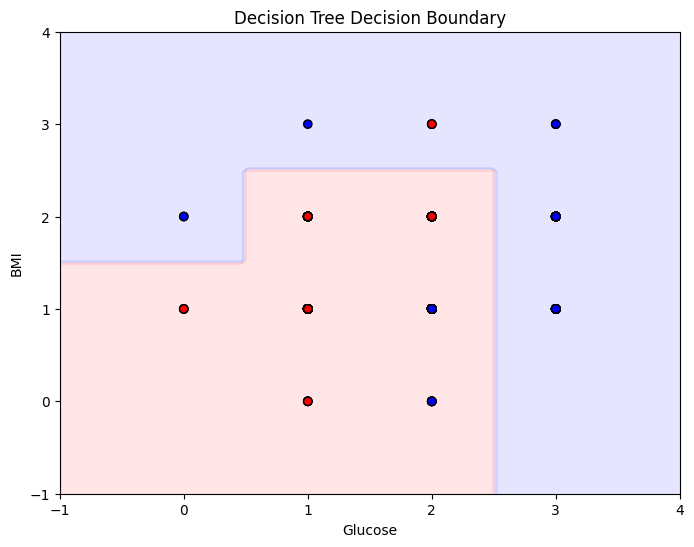

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap



# Select two features for classification
feature_1 = "Glucose"
feature_2 = "BMI"
target = "Outcome"

# Prepare the data
X = df[[feature_1, feature_2]].values
y = df[target].values

# Encode target variable if necessary
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X, y)

# Create a mesh grid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict on mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_points = ListedColormap(['#FF0000', '#0000FF'])
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_points, edgecolor='k')
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title("Decision Tree Decision Boundary")
plt.show()
